In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Load the dataset
file_path = r'C:\Users\dell\Desktop\MyDocs\Docs\MK\deaths-in-armed news v2.csv'
try:
    df = pd.read_csv(file_path)
    display(df.head())
except FileNotFoundError:
    print(f"The file {file_path} was not found. Please ensure the file path is correct.")
    df = pd.DataFrame()  # Create an empty DataFrame to avoid further errors

,Entity,Year,One-sided violence,Non-state,Intrastate,Extrasystemic,Interstate
0,Africa,1989,3598,2507,34907,0,0
1,Africa,1990,6574,1373,64839,0,0
2,Africa,1991,5754,2707,25480,0,0
3,Africa,1992,4087,7460,6887,0,0
4,Africa,1993,11851,13985,15064,0,0


In [4]:
if not df.empty:
    df.isnull().sum()

In [6]:
if not df.empty:
    df.dtypes

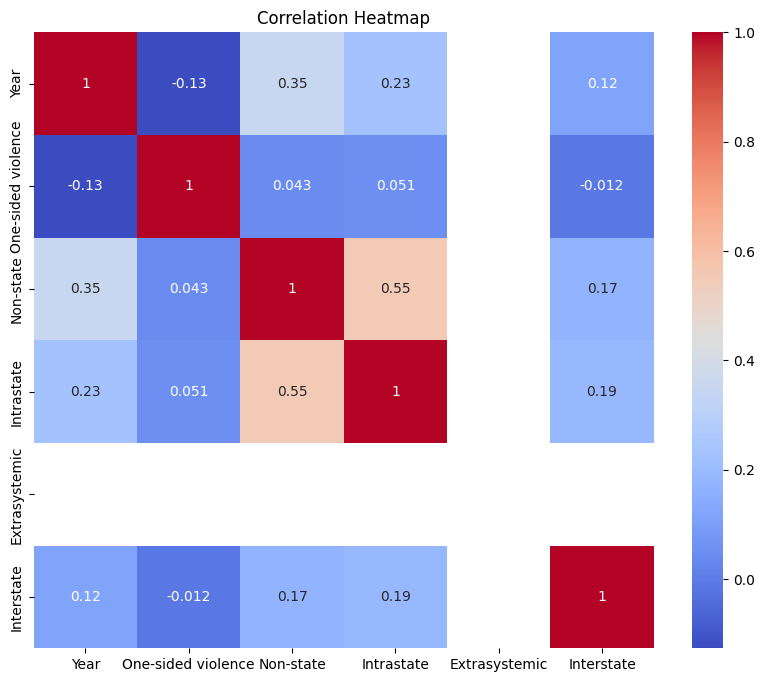

In [7]:
if not df.empty:
    numeric_df = df.select_dtypes(include=[np.number])
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

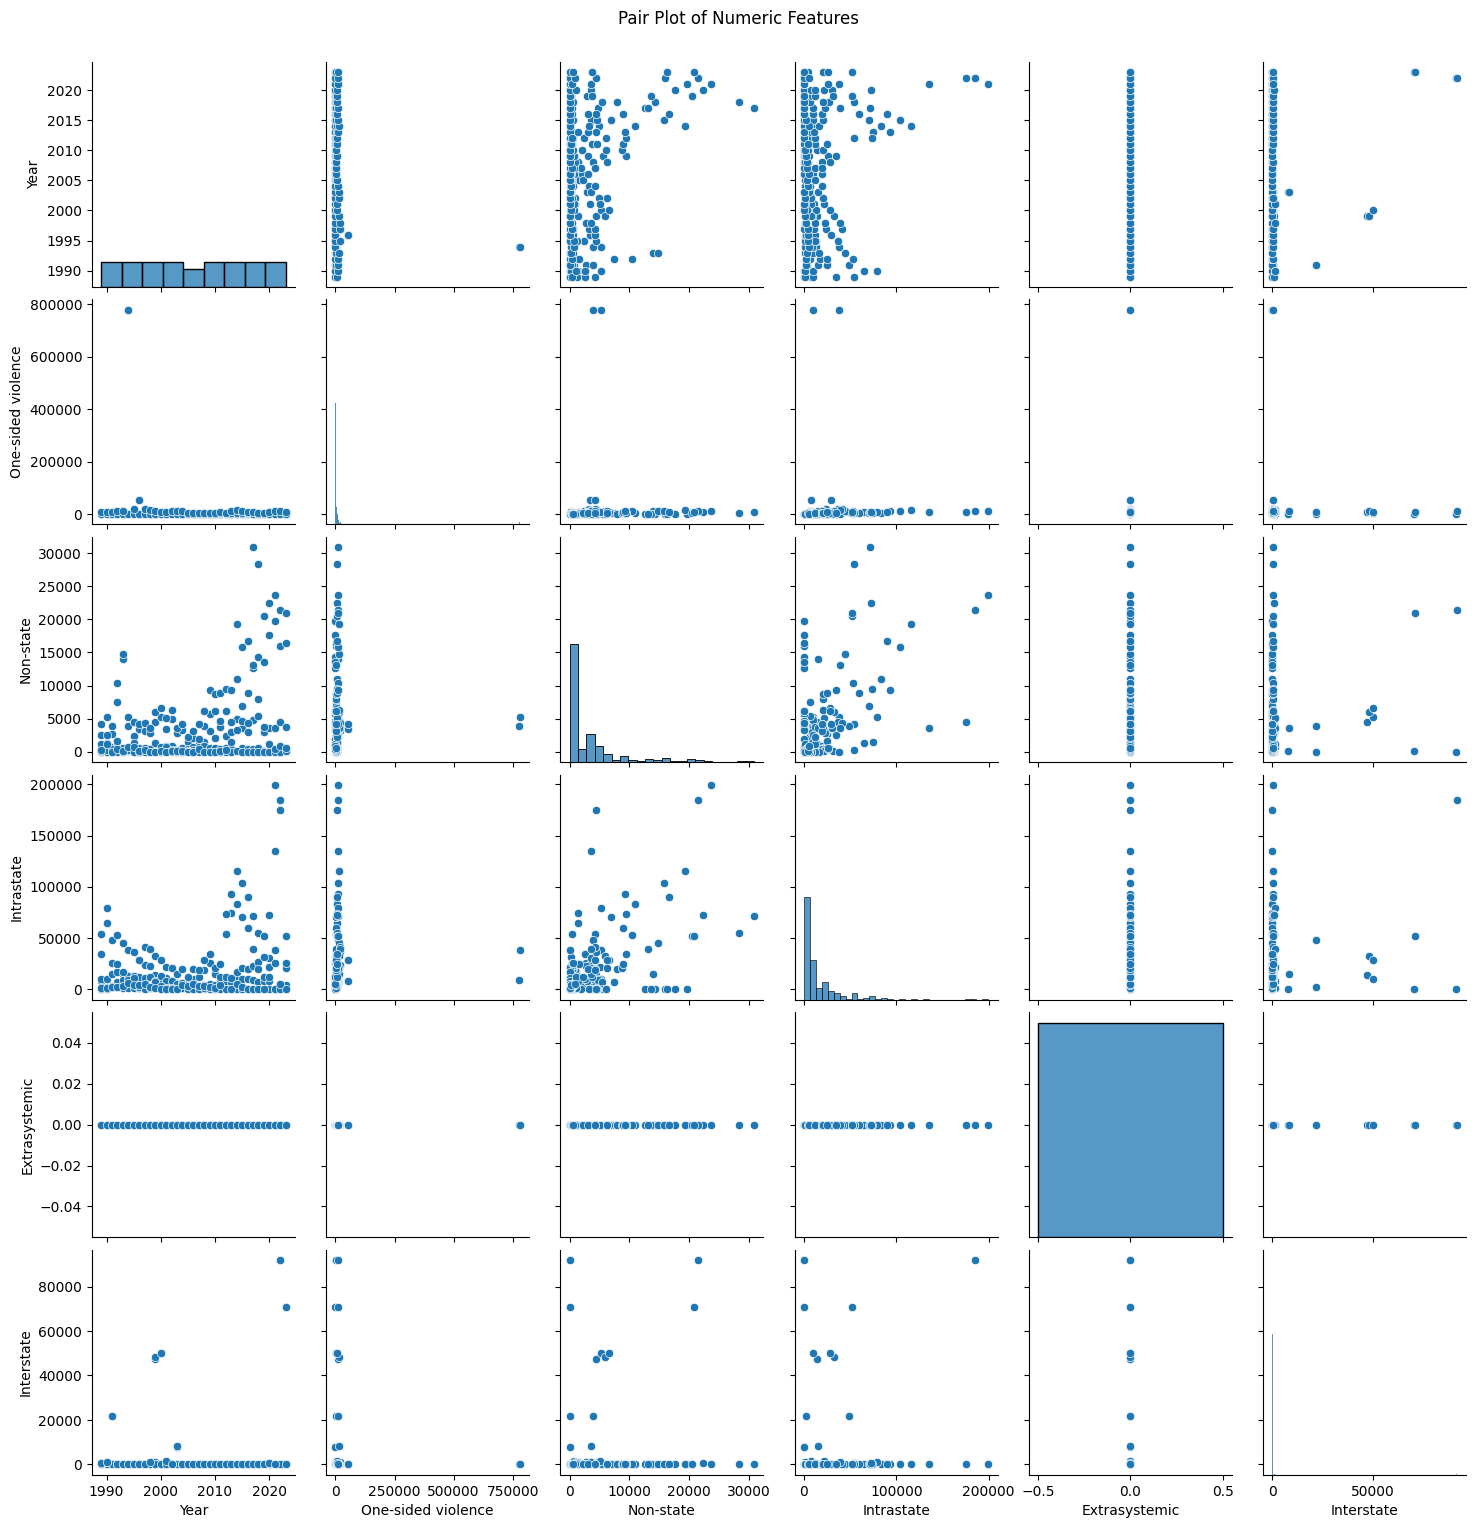

In [8]:
if not df.empty:
    sns.pairplot(numeric_df)
    plt.suptitle('Pair Plot of Numeric Features', y=1.02)
    plt.show()

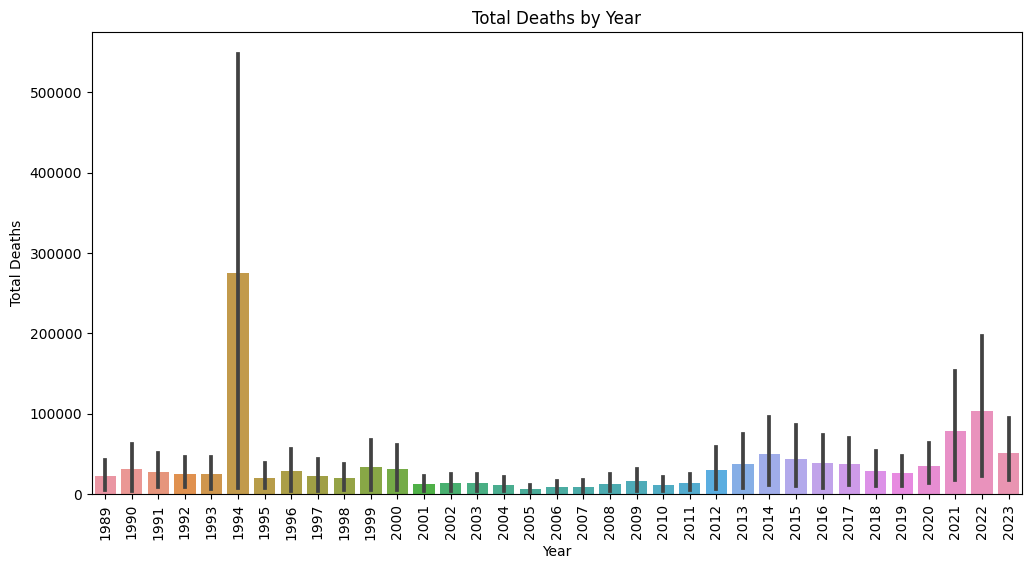

In [9]:
if not df.empty:
    df['Total Deaths'] = df[['One-sided violence', 'Non-state', 'Intrastate', 'Extrasystemic', 'Interstate']].sum(axis=1)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Year', y='Total Deaths', data=df)
    plt.xticks(rotation=90)
    plt.title('Total Deaths by Year')
    plt.show()

In [10]:
# Prepare data for modeling
if not df.empty:
    X = df[['Year', 'One-sided violence', 'Non-state', 'Intrastate', 'Extrasystemic', 'Interstate']]
    y = df['Total Deaths']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
if not df.empty:
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

Mean Squared Error: 2287619884.4394164
R²: 0.8605229854103542


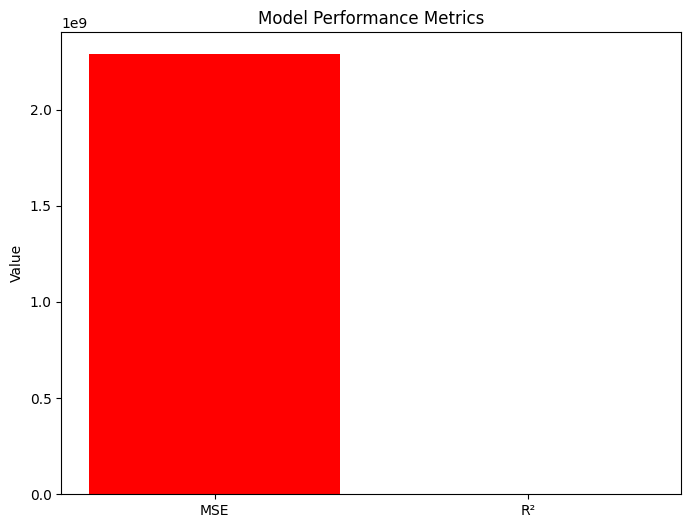

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


if not df.empty:
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate MSE and R²
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Print MSE and R² values
    print(f'Mean Squared Error: {mse}')
    print(f'R²: {r2}')
    
    # Plot the metrics (MSE, R²)
    metrics = ['MSE', 'R²']
    values = [mse, r2]
    
    plt.figure(figsize=(8, 6))
    
    # Bar chart for MSE and R²
    plt.bar(metrics, values, color=['red', 'blue'])
    
    # Labeling the axes
    plt.ylabel('Value')
    plt.title('Model Performance Metrics')
    
    # Show the plot
    plt.show()
